<a href="https://colab.research.google.com/github/L-z-r-s/May-22-/blob/main/Banking%20fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [458]:
# Importing Modules

In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [460]:
data= pd.read_csv("/content/drive/MyDrive/25 May Data Science project/Payment_Data.csv")

In [461]:
data

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0


In [462]:
data['accountAgeDays'].describe()

count    39221.000000
mean       857.563984
std        804.788212
min          1.000000
25%         72.000000
50%        603.000000
75%       1804.000000
max       2000.000000
Name: accountAgeDays, dtype: float64

In [463]:
for i in data.columns:
  print(f"{i} : {data[i].isna().sum()}")

accountAgeDays : 0
numItems : 0
localTime : 0
paymentMethod : 0
paymentMethodAgeDays : 0
Category : 95
isWeekend : 560
label : 0


In [464]:
data[data['label']==1]['isWeekend'].isna().sum()

560

In [465]:
data[data['label']==1]['Category'].isna().sum()

8

In [466]:
data['Category'].value_counts()

Category
shopping       13328
food           12964
electronics    12834
Name: count, dtype: int64

In [467]:
data[data['Category'].isna()]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
13779,66,1,5.017904,paypal,29.544444,NaN,0.0,0
13788,1007,1,5.017904,creditcard,56.104167,NaN,1.0,0
13789,1289,1,4.895263,paypal,886.966667,NaN,0.0,0
13790,2000,1,4.057414,creditcard,0.080556,NaN,1.0,0
13791,236,2,4.921318,paypal,0.002083,NaN,0.0,0
...,...,...,...,...,...,...,...,...
38830,1,2,4.876771,creditcard,0.000000,NaN,NaN,1
38880,1,1,4.876771,creditcard,0.000000,NaN,NaN,1
39005,1,1,4.505662,creditcard,0.000000,NaN,NaN,1
39111,1,3,4.748314,creditcard,0.025000,NaN,NaN,1


In [468]:
data.shape

(39221, 8)

In [469]:
print("Percentage of null values:")
print(f"Category : {data['Category'].isna().sum()/100}%")
print(f"isWeekend : {data['isWeekend'].isna().sum()/100}%")

Percentage of null values:
Category : 0.95%
isWeekend : 5.6%


In [470]:
data[data['label']==1]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
109,1,4,4.836982,creditcard,0.000000,electronics,NaN,1
243,1,1,4.836982,paypal,0.002778,electronics,NaN,1
280,1,1,4.921318,creditcard,0.000000,shopping,NaN,1
362,1,1,4.524580,paypal,0.000000,food,NaN,1
420,1,1,4.748314,paypal,0.000000,food,NaN,1
...,...,...,...,...,...,...,...,...
38830,1,2,4.876771,creditcard,0.000000,NaN,NaN,1
38880,1,1,4.876771,creditcard,0.000000,NaN,NaN,1
39005,1,1,4.505662,creditcard,0.000000,NaN,NaN,1
39111,1,3,4.748314,creditcard,0.025000,NaN,NaN,1


In [471]:
data['isWeekend'].value_counts()

isWeekend
0.0    19348
1.0    19313
Name: count, dtype: int64

In [472]:
data['isWeekend'].unique()

array([ 0.,  1., nan])

In [473]:
data[data['isWeekend'].isna()]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
109,1,4,4.836982,creditcard,0.000000,electronics,NaN,1
243,1,1,4.836982,paypal,0.002778,electronics,NaN,1
280,1,1,4.921318,creditcard,0.000000,shopping,NaN,1
362,1,1,4.524580,paypal,0.000000,food,NaN,1
420,1,1,4.748314,paypal,0.000000,food,NaN,1
...,...,...,...,...,...,...,...,...
38830,1,2,4.876771,creditcard,0.000000,NaN,NaN,1
38880,1,1,4.876771,creditcard,0.000000,NaN,NaN,1
39005,1,1,4.505662,creditcard,0.000000,NaN,NaN,1
39111,1,3,4.748314,creditcard,0.025000,NaN,NaN,1


In [474]:
data[data['isWeekend'].isna()]['paymentMethodAgeDays'].nunique()

49

<Axes: ylabel='Frequency'>

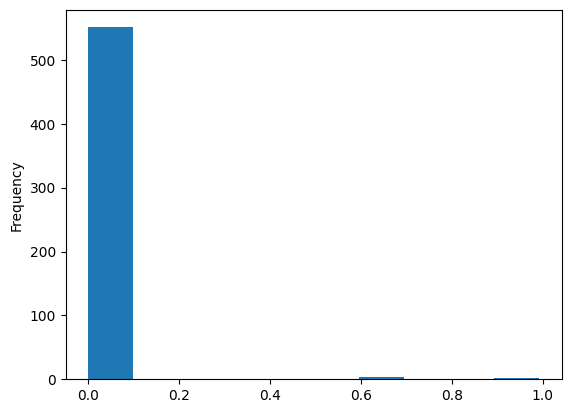

In [475]:
data[data['isWeekend'].isna()]['paymentMethodAgeDays'].plot(kind='hist')

<Axes: ylabel='Frequency'>

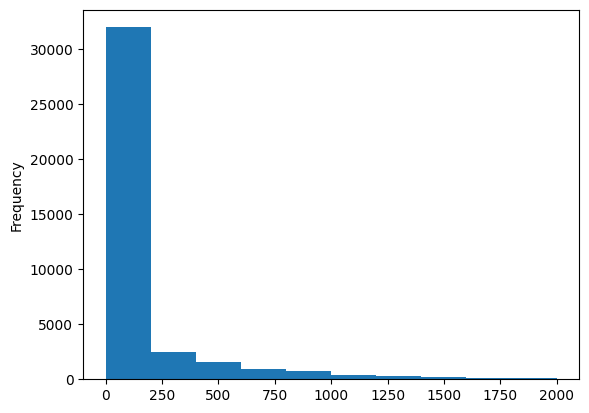

In [476]:
data[data['isWeekend'].isna()==False]['paymentMethodAgeDays'].plot(kind='hist')

In [477]:
data['Category'].value_counts()

Category
shopping       13328
food           12964
electronics    12834
Name: count, dtype: int64

In [478]:
data['Category'].unique()

array(['shopping', 'electronics', 'food', nan], dtype=object)

In [479]:
data[data['Category'].isna()]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
13779,66,1,5.017904,paypal,29.544444,NaN,0.0,0
13788,1007,1,5.017904,creditcard,56.104167,NaN,1.0,0
13789,1289,1,4.895263,paypal,886.966667,NaN,0.0,0
13790,2000,1,4.057414,creditcard,0.080556,NaN,1.0,0
13791,236,2,4.921318,paypal,0.002083,NaN,0.0,0
...,...,...,...,...,...,...,...,...
38830,1,2,4.876771,creditcard,0.000000,NaN,NaN,1
38880,1,1,4.876771,creditcard,0.000000,NaN,NaN,1
39005,1,1,4.505662,creditcard,0.000000,NaN,NaN,1
39111,1,3,4.748314,creditcard,0.025000,NaN,NaN,1


In [480]:
data

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0


In [481]:
data['isWeekend'].value_counts()

isWeekend
0.0    19348
1.0    19313
Name: count, dtype: int64

In [482]:
data[13775:13800]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
13775,129,1,4.742303,creditcard,128.511111,electronics,1.0,0
13776,2000,1,5.017904,paypal,0.000000,food,0.0,0
13777,2000,1,3.483951,creditcard,0.467361,electronics,0.0,0
13778,1941,1,3.483951,paypal,316.713889,food,0.0,0
13779,66,1,5.017904,paypal,29.544444,NaN,0.0,0
13780,3,1,4.886641,paypal,1.954861,food,1.0,0
13781,1589,1,4.524580,creditcard,0.001389,shopping,1.0,0
13782,1705,1,4.962055,creditcard,442.035417,electronics,0.0,0
13783,714,1,3.954522,paypal,0.000000,food,0.0,0
13784,2000,1,4.742303,creditcard,0.083333,shopping,1.0,0


In [483]:
data[data['Category']=='shopping']

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
5,119,1,4.962055,paypal,0.000000,shopping,0.0,0
9,4,1,4.461622,creditcard,0.000000,shopping,1.0,0
14,23,1,4.745402,creditcard,0.001389,shopping,1.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0


In [484]:
data[data['isWeekend']==1]['Category'].value_counts()

Category
shopping       6568
food           6412
electronics    6286
Name: count, dtype: int64

In [485]:
data[data['label']==1]['Category'].value_counts()

Category
shopping       199
food           177
electronics    176
Name: count, dtype: int64

In [486]:
data[data['label']==1]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
109,1,4,4.836982,creditcard,0.000000,electronics,NaN,1
243,1,1,4.836982,paypal,0.002778,electronics,NaN,1
280,1,1,4.921318,creditcard,0.000000,shopping,NaN,1
362,1,1,4.524580,paypal,0.000000,food,NaN,1
420,1,1,4.748314,paypal,0.000000,food,NaN,1
...,...,...,...,...,...,...,...,...
38830,1,2,4.876771,creditcard,0.000000,NaN,NaN,1
38880,1,1,4.876771,creditcard,0.000000,NaN,NaN,1
39005,1,1,4.505662,creditcard,0.000000,NaN,NaN,1
39111,1,3,4.748314,creditcard,0.025000,NaN,NaN,1


In [487]:
data

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0


In [488]:
data['localTime_min'] = data['localTime'].apply(lambda x: str((x % 1) * 60*0.01)[2:4])

In [489]:
data['localTime_hr'] = data['localTime'] .apply (lambda x: str(int(x)))

In [490]:
data

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label,localTime_min,localTime_hr
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0,44,4
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0,44,4
2,845,1,4.921318,creditcard,0.000000,food,1.0,0,55,4
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0,53,4
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0,02,5
...,...,...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0,50,4
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0,52,4
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0,44,4
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0,55,4


In [491]:
data['localTime'] = data['localTime_hr'].apply(lambda x: str(x)) + ':' + data['localTime_min'].apply(lambda x: str(x)) +" AM"

In [492]:
data

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label,localTime_min,localTime_hr
0,29,1,4:44 AM,paypal,28.204861,shopping,0.0,0,44,4
1,725,1,4:44 AM,storecredit,0.000000,electronics,0.0,0,44,4
2,845,1,4:55 AM,creditcard,0.000000,food,1.0,0,55,4
3,503,1,4:53 AM,creditcard,0.000000,electronics,1.0,0,53,4
4,2000,1,5:02 AM,creditcard,0.000000,shopping,0.0,0,02,5
...,...,...,...,...,...,...,...,...,...,...
39216,986,1,4:50 AM,creditcard,0.000000,shopping,0.0,0,50,4
39217,1647,1,4:52 AM,creditcard,377.930556,shopping,0.0,0,52,4
39218,1591,1,4:44 AM,creditcard,0.000000,shopping,1.0,0,44,4
39219,237,1,4:55 AM,creditcard,236.082639,shopping,1.0,0,55,4


In [493]:
data.drop(['localTime_min', 'localTime_hr'], axis=1, inplace=True)

In [494]:
data

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4:44 AM,paypal,28.204861,shopping,0.0,0
1,725,1,4:44 AM,storecredit,0.000000,electronics,0.0,0
2,845,1,4:55 AM,creditcard,0.000000,food,1.0,0
3,503,1,4:53 AM,creditcard,0.000000,electronics,1.0,0
4,2000,1,5:02 AM,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,4:50 AM,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4:52 AM,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4:44 AM,creditcard,0.000000,shopping,1.0,0
39219,237,1,4:55 AM,creditcard,236.082639,shopping,1.0,0


In [495]:
print(data['localTime'].unique())
print(data['localTime'].value_counts())

['4:44 AM' '4:55 AM' '4:53 AM' '5:02 AM' '4:57 AM' '4:52 AM' '4:27 AM'
 '4:30 AM' '4:50 AM' '4:03 AM' '3:29 AM' '2:35 AM' '5:01 AM' '4:31 AM'
 '2:56 AM' '3:03 AM' '3:34 AM' '3:57 AM' '0:25 AM']
localTime
4:44 AM    6244
4:55 AM    4797
4:57 AM    4399
4:53 AM    4394
5:02 AM    4360
4:52 AM    2333
4:31 AM    2302
5:01 AM    2276
4:50 AM    2253
4:30 AM    1531
4:03 AM    1088
4:27 AM    1083
3:57 AM     646
3:34 AM     443
3:29 AM     365
3:03 AM     264
2:56 AM     228
2:35 AM     213
0:25 AM       2
Name: count, dtype: int64


In [496]:
data

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4:44 AM,paypal,28.204861,shopping,0.0,0
1,725,1,4:44 AM,storecredit,0.000000,electronics,0.0,0
2,845,1,4:55 AM,creditcard,0.000000,food,1.0,0
3,503,1,4:53 AM,creditcard,0.000000,electronics,1.0,0
4,2000,1,5:02 AM,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,4:50 AM,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4:52 AM,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4:44 AM,creditcard,0.000000,shopping,1.0,0
39219,237,1,4:55 AM,creditcard,236.082639,shopping,1.0,0


In [498]:
data[data['label']==1]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
109,1,4,4:50 AM,creditcard,0.000000,electronics,NaN,1
243,1,1,4:50 AM,paypal,0.002778,electronics,NaN,1
280,1,1,4:55 AM,creditcard,0.000000,shopping,NaN,1
362,1,1,4:31 AM,paypal,0.000000,food,NaN,1
420,1,1,4:44 AM,paypal,0.000000,food,NaN,1
...,...,...,...,...,...,...,...,...
38830,1,2,4:52 AM,creditcard,0.000000,NaN,NaN,1
38880,1,1,4:52 AM,creditcard,0.000000,NaN,NaN,1
39005,1,1,4:30 AM,creditcard,0.000000,NaN,NaN,1
39111,1,3,4:44 AM,creditcard,0.025000,NaN,NaN,1


In [503]:
print("Max:",min(data[data['label']==1]['paymentMethodAgeDays']))
print("Min:",max(data[data['label']==1]['paymentMethodAgeDays']))

Max: 0.0
Min: 0.991666667


In [504]:
print("Max:",min(data[data['label']==0]['paymentMethodAgeDays']))
print("Min:",max(data[data['label']==0]['paymentMethodAgeDays']))

Max: 0.0
Min: 1999.580556


In [505]:
print("Max:",min(data[data['label']==1]['localTime']))
print("Min:",max(data[data['label']==1]['localTime']))

Max: 2:35 AM
Min: 5:02 AM


In [507]:
print("Value_count:",data[data['label']==1]['accountAgeDays'].value_counts())
print("Max:",max(data[data['label']==1]['accountAgeDays']))
print("Min:",min(data[data['label']==1]['accountAgeDays']))

Value_count: accountAgeDays
1    560
Name: count, dtype: int64
Max: 1
Min: 1


In [509]:
print("Value_count:",data[data['label']==0]['accountAgeDays'].value_counts())
print("Max:",max(data[data['label']==0]['accountAgeDays']))
print("Min:",min(data[data['label']==0]['accountAgeDays']))

Value_count: accountAgeDays
2000    8212
2       1243
3        723
4        477
5        388
        ... 
1815       1
1065       1
1472       1
1943       1
1512       1
Name: count, Length: 1998, dtype: int64
Max: 2000
Min: 2


In [508]:
print("Value_count:",data[data['label']==1]['numItems'].value_counts())
print("Max:",max(data[data['label']==1]['numItems']))
print("Min:",min(data[data['label']==1]['numItems']))

Value_count: numItems
1     454
2      82
3      16
5       4
4       3
10      1
Name: count, dtype: int64
Max: 10
Min: 1


In [ ]:
sns.lineplot(data=data, x='localTime', y='')

In [ ]:
data

In [ ]:
data.isna().sum()

In [ ]:
sns.histplot(data['accountAgeDays'])

In [ ]:
data['numItems'].value_counts()

In [ ]:
data['numItems'].plot(kind='hist')

In [ ]:
data.shape

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data

In [ ]:
data.isna().sum()

In [ ]:
data.info()

In [ ]:
data

In [ ]:
data['localTime'].dtype

In [ ]:
data['localTime_min'] = pd.to_datetime(data['localTime'])

In [ ]:
data

In [ ]:
data.drop('localTime_min', inplace=True, axis=1)

In [ ]:
data

In [ ]:
data

In [ ]:
data

In [ ]:
data

In [ ]:
data['label'].value_counts()

In [ ]:
data1= pd.read_csv("/content/drive/MyDrive/25 May Data Science project/Payment_Data.csv")